In [ ]:
!pip install ultralytics
!pip install opencv-python
!pip install matplotlib
!pip install pillow

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw


In [ ]:
test = Image.open("datasets/fox/test/images/007de825130c594c.jpg")
with open("datasets/fox/test/labels/007de825130c594c.txt" , 'r') as label:
  label = label.read()
  label = label.split()
  x = float(label[1])
  y = float(label[2])
  x_2 = float(label[3])
  y_2 = float(label[4])
  rect  = ImageDraw.Draw(test)
  center_x = int(((x_2 - x) / 2) + x)
  center_y = int(((y_2 - y) / 2) + y)
  test.putpixel((center_x, center_y), (255, 0, 0))
  print(x, y, x_2, y_2)
  print(test.size)
  rect.rectangle([(x, y), (x_2, y_2)], outline='red')

test


356.68172799999996 204.922692 952.429568 615.3835779999999
(1024, 731)


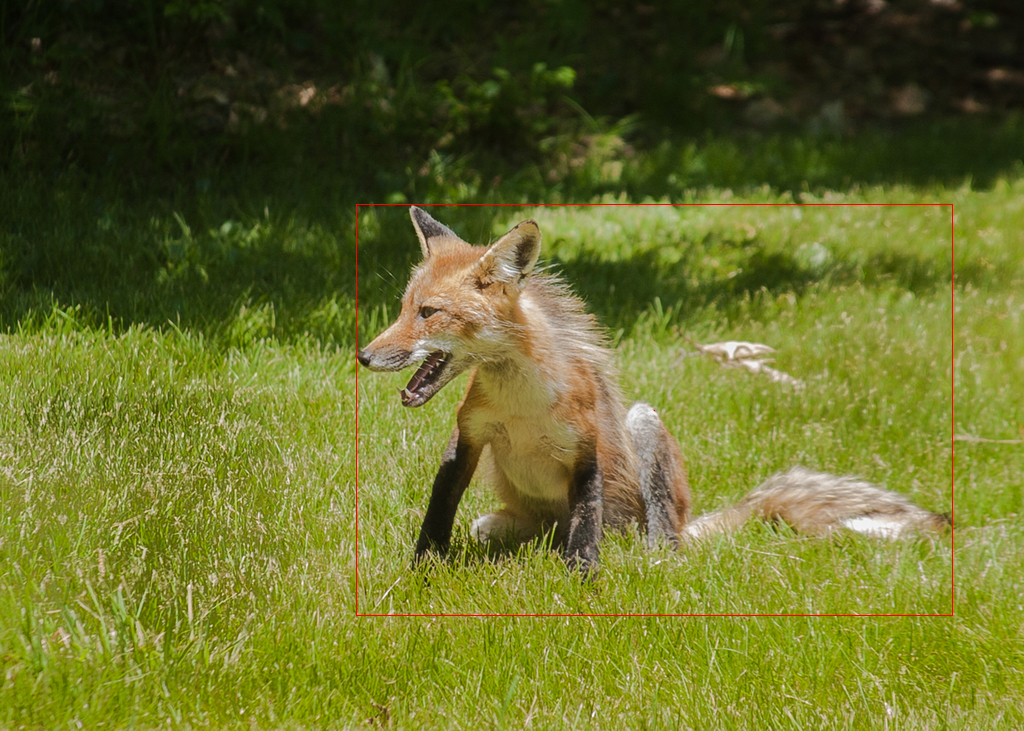

In [ ]:
test = Image.open("/content/drive/MyDrive/animal_capture/datasets/fox/test/images/007de825130c594c.jpg")
with open("/content/drive/MyDrive/animal_capture/datasets/fox/test/labels/007de825130c594c.txt" , 'r') as label:
  label = label.read()
  label = label.split()
  x = float(label[1])
  y = float(label[2])
  x_2 = float(label[3])
  y_2 = float(label[4])
  rect  = ImageDraw.Draw(test)
  center_x = int(((x_2 - x) / 2) + x)
  center_y = int(((y_2 - y) / 2) + y)
  test.putpixel((center_x, center_y), (255, 0, 0))
  print(x, y, x_2, y_2)
  print(test.size)
  rect.rectangle([(x, y), (x_2, y_2)], outline='red')

test


In [ ]:
import os

def normalizing_labels(files, path):
  for file in files:
    file = path + file
    image_path = file.replace('.txt', '.jpg').replace('labels', 'images')
    image = Image.open(image_path)
    total_x = image.size[0]
    total_y = image.size[1]
    with open(file, 'r') as label:
        label = label.read()
      #replacing"Fox" for the number indicated in the yaml
        label =  label.replace('Fox', '0')
        label = label.split()
        animal_label = label[0]
        x0 = float(label[1])
        y0 = float(label[2])
        x1 = float(label[3])
        y1 = float(label[4])

        #center coordenates
        center_x = int(((x1 - x0) / 2) + x0)
        center_y = int(((y1 - y0) / 2) + y0)
        width = x1 - x0
        height = y1 - y0

        normalized_center_x = center_x /total_x
        normalized_center_y = center_y /total_y
        normalized_width = width / total_x
        normalized_height = height / total_y
    normalized_label = "{} {} {} {} {}".format(animal_label, normalized_center_x, normalized_center_y, normalized_width, normalized_height)
    with open(file, 'w') as txt:
        txt.write(normalized_label)
  return


labels_test = os.listdir('datasets/fox/test/labels')
labels_train = os.listdir('datasets/fox/train/labels')
normalizing_labels(labels_test, "datasets/fox/test/labels/")
normalizing_labels(labels_train, "datasets/fox/train/labels/")

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/drive/MyDrive/animal_capture/yolov8n.pt")

# train the model
results = model.train(
data="fox.yaml",
project="models",
batch=8,
save_period=1,
save_json=True,
epochs=150
)

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/animal_capture/yolov8n.pt, data=/content/drive/MyDrive/animal_capture/fox.yaml, epochs=150, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/animal_capture/training_fox, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save

train: Scanning /content/drive/MyDrive/animal_capture/datasets/fox/train/labels... 148 images, 0 backgrounds, 0 corrupt: 100%|██████████| 148/148 [00:00<00:00, 220.91it/s]


train: New cache created: /content/drive/MyDrive/animal_capture/datasets/fox/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/animal_capture/datasets/fox/test/labels... 69 images, 0 backgrounds, 3 corrupt: 100%|██████████| 69/69 [00:01<00:00, 64.71it/s]

val: WARNING ⚠️ /content/drive/MyDrive/animal_capture/datasets/fox/test/images/007de825130c594c.jpg: ignoring corrupt image/label: could not convert string to float: 'Fox'
val: WARNING ⚠️ /content/drive/MyDrive/animal_capture/datasets/fox/test/images/64dbc921847fea7e.jpg: ignoring corrupt image/label: could not convert string to float: 'Fox'
val: WARNING ⚠️ /content/drive/MyDrive/animal_capture/datasets/fox/test/images/e35fca8150fc3249.jpg: ignoring corrupt image/label: could not convert string to float: 'Fox'
val: New cache created: /content/drive/MyDrive/animal_capture/datasets/fox/test/labels.cache


Plotting labels to /content/drive/MyDrive/animal_capture/training_fox/train24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      1.42G     0.8009      2.128      1.335         10        640: 100%|██████████| 19/19 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:24<00:00,  4.84s/it]

                   all         66         66      0.938      0.228      0.765      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      1.25G     0.8017      1.517      1.293         12        640: 100%|██████████| 19/19 [00:04<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


                   all         66         66      0.807      0.742      0.869      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.25G     0.8394       1.54      1.362         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]

                   all         66         66      0.492      0.591      0.463      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      1.25G     0.9965      1.581      1.427         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


                   all         66         66      0.536      0.606      0.529      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      1.24G      1.036       1.63      1.492          6        640: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.74it/s]

                   all         66         66      0.429      0.444      0.385      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      1.25G      1.189      1.655       1.62          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all         66         66      0.518      0.712      0.553      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      1.24G      1.136      1.712       1.56          5        640: 100%|██████████| 19/19 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all         66         66      0.542      0.712       0.62      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      1.24G      1.071      1.536      1.477          6        640: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all         66         66      0.488      0.606      0.468      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      1.24G      1.164      1.493      1.587          7        640: 100%|██████████| 19/19 [00:05<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.95it/s]

                   all         66         66      0.286      0.364      0.243     0.0572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      1.25G      1.185      1.495      1.569          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.72it/s]

                   all         66         66      0.632      0.808      0.693      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      1.24G      1.131      1.416      1.492         16        640: 100%|██████████| 19/19 [00:06<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all         66         66      0.655      0.667      0.716      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      1.24G      1.047      1.348      1.449         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]

                   all         66         66      0.737      0.742       0.76      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      1.24G      1.033      1.256      1.434         13        640: 100%|██████████| 19/19 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.97it/s]

                   all         66         66      0.612      0.773      0.679      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      1.24G      1.068      1.302      1.475          6        640: 100%|██████████| 19/19 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]

                   all         66         66      0.708      0.636      0.705      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      1.25G      1.147       1.28      1.513          9        640: 100%|██████████| 19/19 [00:06<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.89it/s]

                   all         66         66       0.42      0.242      0.221     0.0901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      1.25G      1.096      1.232      1.479         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.14it/s]

                   all         66         66      0.441      0.671      0.519       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      1.25G      1.083      1.256      1.486          8        640: 100%|██████████| 19/19 [00:06<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all         66         66      0.553      0.561      0.599      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      1.25G      1.125      1.266      1.523         15        640: 100%|██████████| 19/19 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]

                   all         66         66      0.767      0.798      0.796      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      1.24G      1.063      1.185      1.491         10        640: 100%|██████████| 19/19 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all         66         66      0.743      0.834      0.853      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      1.24G      1.018      1.182      1.466          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]

                   all         66         66      0.841      0.803      0.874      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      1.25G     0.9656      1.086      1.391         10        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]


                   all         66         66       0.87      0.813      0.905       0.44

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      1.25G      1.042      1.232      1.435         12        640: 100%|██████████| 19/19 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all         66         66      0.835      0.848      0.908      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      1.24G      1.019       1.12      1.409          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.50it/s]


                   all         66         66      0.619      0.682      0.678       0.35

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      1.24G      1.017      1.091      1.408         14        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]

                   all         66         66      0.855      0.807      0.878       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      1.25G       1.02       1.09      1.463         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.95it/s]


                   all         66         66      0.805      0.833      0.867      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      1.25G     0.9727      1.051      1.418         12        640: 100%|██████████| 19/19 [00:05<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]

                   all         66         66      0.777      0.788      0.857      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      1.25G      1.045      1.036      1.435         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]

                   all         66         66       0.85      0.833      0.909      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      1.24G     0.9512     0.9947      1.364          9        640: 100%|██████████| 19/19 [00:05<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.29it/s]

                   all         66         66      0.861      0.843      0.885       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      1.24G     0.9514     0.9955      1.404          6        640: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all         66         66      0.877      0.803      0.908      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      1.24G     0.9061     0.9894      1.316         14        640: 100%|██████████| 19/19 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.33it/s]

                   all         66         66      0.843      0.893      0.896      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      1.24G     0.9596      0.993       1.34         14        640: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.07it/s]

                   all         66         66      0.746      0.848      0.812      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      1.24G     0.9569      0.975      1.375         11        640: 100%|██████████| 19/19 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all         66         66      0.895      0.904      0.945      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      1.24G      1.018     0.9892      1.459         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.35it/s]

                   all         66         66      0.866      0.848        0.9       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      1.25G     0.8926     0.9328      1.329         10        640: 100%|██████████| 19/19 [00:06<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all         66         66      0.887      0.833      0.927      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      1.24G     0.8928     0.9219      1.303          7        640: 100%|██████████| 19/19 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.28it/s]

                   all         66         66      0.891      0.879      0.907      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      1.24G     0.8862     0.9056       1.32         11        640: 100%|██████████| 19/19 [00:06<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all         66         66       0.84      0.879      0.894      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      1.25G     0.8296      0.842      1.286         14        640: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all         66         66      0.882      0.864      0.896      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      1.24G     0.8812     0.8811       1.33         11        640: 100%|██████████| 19/19 [00:05<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]


                   all         66         66      0.923       0.91      0.935       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      1.24G     0.9396     0.9896      1.388          8        640: 100%|██████████| 19/19 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         66         66      0.884      0.848      0.902      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      1.24G     0.9688     0.9152      1.414         11        640: 100%|██████████| 19/19 [00:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]


                   all         66         66      0.889      0.848      0.902      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      1.25G     0.9175     0.8653      1.327         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

                   all         66         66      0.882      0.903      0.946      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      1.25G     0.8372     0.8371      1.298         13        640: 100%|██████████| 19/19 [00:04<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.61it/s]

                   all         66         66      0.897      0.848      0.921       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      1.24G     0.8513     0.7854      1.302         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.11it/s]

                   all         66         66       0.87      0.913      0.946       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      1.24G      0.838     0.8167      1.305          7        640: 100%|██████████| 19/19 [00:05<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all         66         66      0.897      0.909      0.953      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      1.24G     0.7844     0.7718      1.249         11        640: 100%|██████████| 19/19 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.78it/s]

                   all         66         66      0.899      0.949       0.95      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      1.24G     0.7854     0.7495      1.276         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.14it/s]

                   all         66         66      0.948      0.924      0.952      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      1.25G     0.8507     0.7733      1.259         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]

                   all         66         66      0.903      0.939      0.953      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      1.25G     0.8071     0.7545      1.262         11        640: 100%|██████████| 19/19 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all         66         66      0.927       0.77      0.891      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      1.24G     0.8558     0.8215      1.332         12        640: 100%|██████████| 19/19 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all         66         66       0.95      0.833      0.948      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      1.24G     0.8333     0.7795      1.279          5        640: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all         66         66      0.901      0.894      0.913      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      1.24G     0.7821     0.7473      1.253         13        640: 100%|██████████| 19/19 [00:05<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]

                   all         66         66      0.872      0.818      0.918      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      1.24G     0.8464     0.8282      1.301         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all         66         66      0.905      0.848      0.936       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      1.25G     0.7944     0.7781       1.27          7        640: 100%|██████████| 19/19 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.30it/s]

                   all         66         66      0.909       0.91       0.96      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      1.25G     0.7658       0.73      1.251         11        640: 100%|██████████| 19/19 [00:03<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.40it/s]

                   all         66         66        0.9       0.97      0.966      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      1.25G     0.7675     0.7663      1.219         13        640: 100%|██████████| 19/19 [00:06<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]

                   all         66         66      0.825      0.833      0.898      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      1.24G     0.7791     0.7624      1.281         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.36it/s]

                   all         66         66        0.8      0.924      0.922      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      1.24G     0.7851     0.7815      1.251          7        640: 100%|██████████| 19/19 [00:06<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.31it/s]

                   all         66         66      0.932      0.924      0.946      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      1.24G      0.714     0.7091      1.192          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.70it/s]

                   all         66         66      0.848      0.818      0.875      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      1.24G     0.6487     0.6578      1.153         14        640: 100%|██████████| 19/19 [00:07<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]

                   all         66         66      0.804      0.864      0.854      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      1.24G     0.7404     0.6767      1.247         12        640: 100%|██████████| 19/19 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]

                   all         66         66      0.798      0.899      0.917      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      1.24G     0.7494      0.692      1.251         12        640: 100%|██████████| 19/19 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.98it/s]

                   all         66         66      0.884      0.921      0.951      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      1.24G     0.7212     0.6622      1.194          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all         66         66      0.884      0.924      0.934      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      1.24G     0.8205     0.7984      1.277         10        640: 100%|██████████| 19/19 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all         66         66      0.871      0.922      0.913      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      1.24G     0.7132      0.681      1.204         16        640: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]

                   all         66         66      0.803      0.924      0.868      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      1.24G     0.6739      0.698      1.167          5        640: 100%|██████████| 19/19 [00:05<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.18it/s]

                   all         66         66       0.91      0.919      0.945      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      1.24G     0.7452     0.6746      1.229         12        640: 100%|██████████| 19/19 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all         66         66      0.849      0.939      0.935      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      1.24G     0.7171     0.6771      1.192         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]


                   all         66         66      0.887      0.949       0.97      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      1.24G      0.705     0.6608      1.213         11        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all         66         66      0.908      0.902       0.95      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      1.24G     0.7285     0.6777      1.191          5        640: 100%|██████████| 19/19 [00:04<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.05it/s]

                   all         66         66      0.859      0.924      0.948      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      1.24G     0.6931     0.6727      1.191          6        640: 100%|██████████| 19/19 [00:04<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all         66         66      0.898      0.933      0.943      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      1.24G     0.6584     0.5992      1.143          8        640: 100%|██████████| 19/19 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]

                   all         66         66       0.86      0.955      0.941      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      1.24G     0.6757     0.6811      1.181         15        640: 100%|██████████| 19/19 [00:05<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all         66         66      0.911       0.93      0.957      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      1.24G     0.6146     0.5706      1.135          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]

                   all         66         66      0.885       0.93      0.968      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      1.24G     0.6403     0.6026      1.171          7        640: 100%|██████████| 19/19 [00:06<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.29it/s]

                   all         66         66      0.914      0.972      0.975      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      1.25G      0.703     0.5905      1.204         12        640: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.44it/s]

                   all         66         66      0.966      0.862      0.958      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      1.24G     0.7062     0.6381      1.209         10        640: 100%|██████████| 19/19 [00:06<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.66it/s]

                   all         66         66      0.933      0.847      0.941      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      1.24G     0.7244     0.6667      1.209         10        640: 100%|██████████| 19/19 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all         66         66      0.894       0.97       0.96      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      1.24G     0.6551     0.6052      1.151         12        640: 100%|██████████| 19/19 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all         66         66      0.914      0.964      0.973      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      1.24G      0.682     0.6789      1.185         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.36it/s]

                   all         66         66      0.984      0.934      0.979      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      1.24G     0.6314     0.6237      1.144         12        640: 100%|██████████| 19/19 [00:06<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]

                   all         66         66      0.972      0.924      0.976       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      1.24G     0.6266     0.5992      1.135         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]

                   all         66         66      0.995      0.848      0.969      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      1.24G     0.6314     0.6012      1.152          6        640: 100%|██████████| 19/19 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.65it/s]


                   all         66         66      0.966      0.862      0.968      0.739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      1.24G     0.6312     0.5665      1.157          7        640: 100%|██████████| 19/19 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.84it/s]


                   all         66         66      0.929      0.939      0.973      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      1.24G     0.6289     0.5949       1.13          9        640: 100%|██████████| 19/19 [00:05<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all         66         66      0.961      0.924      0.976      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      1.24G     0.6175     0.5791       1.17         11        640: 100%|██████████| 19/19 [00:04<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.47it/s]

                   all         66         66       0.94      0.894      0.963      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      1.24G     0.6303     0.5748      1.138          9        640: 100%|██████████| 19/19 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all         66         66       0.91      0.921      0.949      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      1.24G     0.6436     0.5668      1.188         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]

                   all         66         66      0.935      0.955      0.956      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      1.24G     0.6441     0.5603      1.188         11        640: 100%|██████████| 19/19 [00:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]

                   all         66         66      0.924      0.955      0.954      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      1.24G     0.6666     0.5793      1.167         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.13it/s]

                   all         66         66       0.94      0.939      0.967      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      1.24G     0.5691     0.5373      1.122          6        640: 100%|██████████| 19/19 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]

                   all         66         66      0.978      0.955      0.984      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      1.25G     0.6474     0.5383      1.157         14        640: 100%|██████████| 19/19 [00:04<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.43it/s]

                   all         66         66      0.966      0.955      0.988      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      1.24G      0.619      0.536      1.145         11        640: 100%|██████████| 19/19 [00:04<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all         66         66      0.941      0.939      0.976      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      1.24G     0.6193     0.5217      1.149         13        640: 100%|██████████| 19/19 [00:05<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all         66         66      0.923      0.924      0.967      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      1.24G     0.6041     0.5462      1.138         12        640: 100%|██████████| 19/19 [00:03<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.63it/s]

                   all         66         66      0.911      0.927      0.964       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      1.24G     0.5826      0.522      1.095         11        640: 100%|██████████| 19/19 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.89it/s]

                   all         66         66       0.93      0.955      0.971      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      1.24G     0.5894     0.5467      1.134          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.13it/s]

                   all         66         66      0.954      0.939      0.971      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      1.24G     0.5712     0.5085      1.125          9        640: 100%|██████████| 19/19 [00:06<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.56it/s]

                   all         66         66      0.955      0.968      0.967      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      1.25G      0.552     0.5081      1.089          8        640: 100%|██████████| 19/19 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.15it/s]

                   all         66         66      0.927      0.969      0.967      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      1.24G     0.5651     0.5349       1.08         12        640: 100%|██████████| 19/19 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all         66         66      0.911      0.955      0.942      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      1.24G     0.5686      0.535      1.118         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         66         66      0.889      0.924      0.921      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      1.24G     0.5693     0.5484      1.154          9        640: 100%|██████████| 19/19 [00:05<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all         66         66      0.913       0.95       0.96       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      1.24G     0.5852      0.542      1.109         14        640: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all         66         66      0.924      0.955      0.969      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      1.24G     0.5401     0.4997      1.093          6        640: 100%|██████████| 19/19 [00:04<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.23it/s]

                   all         66         66      0.933      0.955      0.979      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      1.24G     0.5038     0.4755      1.062         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all         66         66      0.927       0.97      0.974      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      1.24G     0.5542     0.4789      1.108         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all         66         66      0.924      0.955      0.975      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      1.24G     0.6029     0.5509      1.131          6        640: 100%|██████████| 19/19 [00:05<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.99it/s]

                   all         66         66      0.913      0.953       0.97      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      1.24G     0.5597     0.5237      1.097         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]

                   all         66         66      0.888       0.97      0.975      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      1.24G     0.5486     0.4917      1.102         13        640: 100%|██████████| 19/19 [00:04<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.50it/s]

                   all         66         66      0.933      0.924      0.972      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      1.24G     0.5912     0.5059      1.115         11        640: 100%|██████████| 19/19 [00:04<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.32it/s]

                   all         66         66      0.925      0.936      0.969      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      1.24G     0.5453       0.49      1.077         11        640: 100%|██████████| 19/19 [00:05<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.41it/s]

                   all         66         66      0.983      0.886      0.969      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      1.24G     0.5599     0.5115      1.096          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.79it/s]

                   all         66         66        0.9      0.954       0.97      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      1.25G     0.5254     0.4683      1.053         14        640: 100%|██████████| 19/19 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]

                   all         66         66      0.898       0.97      0.971      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      1.24G     0.5598     0.5001      1.129          7        640: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.74it/s]

                   all         66         66      0.889      0.967      0.972      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      1.25G     0.5374     0.4921      1.096         10        640: 100%|██████████| 19/19 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.56it/s]

                   all         66         66      0.926      0.952      0.974      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      1.25G     0.5271      0.481      1.088         11        640: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.58it/s]

                   all         66         66       0.94       0.97      0.975      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      1.24G     0.5114      0.487      1.045          7        640: 100%|██████████| 19/19 [00:06<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.57it/s]

                   all         66         66      0.926       0.97      0.977      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      1.24G     0.5211     0.4756      1.098          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.06it/s]

                   all         66         66      0.911       0.97      0.973       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      1.25G     0.4877     0.4419      1.046         10        640: 100%|██████████| 19/19 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]

                   all         66         66      0.924       0.97       0.97      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      1.25G     0.4519     0.4211      1.041          8        640: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]

                   all         66         66      0.924       0.97      0.974      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      1.24G     0.4946     0.4421      1.054         12        640: 100%|██████████| 19/19 [00:05<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all         66         66      0.911       0.97      0.975      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      1.24G     0.5104     0.4438      1.093          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.53it/s]

                   all         66         66      0.902      0.981      0.977      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      1.24G     0.5158     0.4461      1.072         10        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.26it/s]

                   all         66         66      0.966      0.924      0.978      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      1.24G     0.5243     0.4836      1.094         12        640: 100%|██████████| 19/19 [00:04<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all         66         66      0.968      0.923      0.975      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      1.24G     0.4754      0.428      1.066         10        640: 100%|██████████| 19/19 [00:04<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

                   all         66         66      0.907       0.97      0.972      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      1.24G     0.4454     0.4185      1.023         10        640: 100%|██████████| 19/19 [00:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.55it/s]

                   all         66         66      0.889      0.985      0.965       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      1.24G     0.5411      0.479      1.102         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all         66         66      0.864      0.965      0.958      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      1.25G     0.5095     0.4602      1.077         13        640: 100%|██████████| 19/19 [00:05<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.10it/s]

                   all         66         66        0.9      0.959      0.961       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      1.24G     0.4601     0.4268      1.061          6        640: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all         66         66      0.939      0.939      0.968      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      1.24G     0.5043     0.4594      1.087         10        640: 100%|██████████| 19/19 [00:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.39it/s]

                   all         66         66      0.925       0.94      0.967       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      1.25G      0.521     0.4673      1.084         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.98it/s]

                   all         66         66      0.954      0.939      0.971      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      1.25G     0.4499     0.4235      1.026         10        640: 100%|██████████| 19/19 [00:05<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.55it/s]

                   all         66         66      0.937       0.97      0.973      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      1.24G     0.4835     0.4405      1.097         11        640: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all         66         66      0.946      0.939      0.975       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      1.24G     0.4558     0.4169      1.029         13        640: 100%|██████████| 19/19 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.64it/s]

                   all         66         66      0.945      0.939      0.973      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      1.24G     0.5028     0.4631      1.084          7        640: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.20it/s]

                   all         66         66      0.925      0.939      0.969      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      1.24G     0.4857      0.425       1.05         14        640: 100%|██████████| 19/19 [00:06<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

                   all         66         66      0.953      0.939      0.977       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      1.24G     0.4438     0.4097      1.028         10        640: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all         66         66      0.949      0.924      0.978      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      1.24G     0.4481     0.3969      1.038          6        640: 100%|██████████| 19/19 [00:06<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]

                   all         66         66      0.886      0.985      0.983      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      1.24G     0.4749     0.4198      1.049          9        640: 100%|██████████| 19/19 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.21it/s]

                   all         66         66      0.899      0.985      0.983      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      1.25G     0.4414     0.4338      1.045          8        640: 100%|██████████| 19/19 [00:06<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all         66         66      0.888      0.985      0.984      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      1.24G     0.4619     0.4302      1.026         14        640: 100%|██████████| 19/19 [00:04<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.33it/s]

                   all         66         66      0.934       0.97       0.98      0.786


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      1.38G     0.3369     0.4031     0.9063          4        640: 100%|██████████| 19/19 [00:10<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]

                   all         66         66      0.941      0.985      0.978      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      1.24G     0.3221     0.3914     0.9304          4        640: 100%|██████████| 19/19 [00:03<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.61it/s]

                   all         66         66      0.936      0.985      0.976      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      1.24G     0.3077     0.3418     0.9151          4        640: 100%|██████████| 19/19 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.23it/s]

                   all         66         66       0.96      0.939      0.972       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      1.24G     0.3361     0.3576     0.9615          4        640: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.69it/s]

                   all         66         66      0.938      0.985      0.971       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      1.24G      0.316     0.3367     0.9462          4        640: 100%|██████████| 19/19 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]

                   all         66         66      0.955      0.974      0.973      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      1.24G     0.2819     0.3048     0.8818          4        640: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         66         66      0.961       0.97      0.973      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      1.24G     0.3092     0.3318      0.914          4        640: 100%|██████████| 19/19 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all         66         66      0.959       0.97      0.973      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      1.24G     0.2984     0.3106     0.9296          4        640: 100%|██████████| 19/19 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.65it/s]

                   all         66         66      0.959       0.97      0.973      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      1.24G     0.3066     0.3097     0.9231          4        640: 100%|██████████| 19/19 [00:04<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all         66         66      0.965       0.97      0.973      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      1.24G     0.2648      0.283     0.8894          4        640: 100%|██████████| 19/19 [00:04<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.47it/s]

                   all         66         66      0.955       0.97       0.97      0.751



150 epochs completed in 0.336 hours.
Optimizer stripped from /content/drive/MyDrive/animal_capture/training_fox/train24/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/animal_capture/training_fox/train24/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/animal_capture/training_fox/train24/weights/best.pt...
Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


                   all         66         66      0.935       0.97       0.98      0.786
Speed: 0.7ms preprocess, 8.4ms inference, 0.0ms loss, 6.2ms postprocess per image
Saving /content/drive/MyDrive/animal_capture/training_fox/train24/predictions.json...
Results saved to /content/drive/MyDrive/animal_capture/training_fox/train24
